In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
path = "C:/Users/ASUS/Desktop/ml full/ML/housing data/BostonHousing.csv"
df=pd.read_csv(path)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [183]:
 df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [184]:
target_feature="medv"
y=df[target_feature]
x=df.drop(target_feature,axis=1)

In [185]:
x.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [186]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

# linear regression(normal),ridge,lasso

In [187]:
X = df.drop(columns='medv')
Y = df['medv']

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [189]:
 from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [190]:
train_score=round(model.score(X_train,Y_train)*100,2)
print(f"Training Score: {train_score}%")


Training Score: 76.99%


In [191]:
Y_pred=model.predict(X_test)
from sklearn.metrics import r2_score
score=round(r2_score(Y_test,Y_pred)*100,2)
print(f"Testing Score: {score}%")


Testing Score: 57.85%


In [192]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3.7807629091749604
Mean Squared Error: 34.05648134887457
Root Mean Squared Error: 5.835793120808393


In [193]:
df1=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred,"Varience":Y_test-Y_pred})
df1.head()


,Actual,Predicted,Varience
357,21.7,23.016076,-1.316076
337,18.5,19.175452,-0.675452
327,22.2,19.931333,2.268667
13,20.4,19.192223,1.207777
418,8.8,4.733661,4.066339


In [194]:
model.predict([[0.62976,0.0,8.14,0,.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([19.19222285])

In [195]:
model.intercept_

23.554245467591745

In [196]:
model.coef_


array([-1.24649091e-01,  3.04735052e-02,  2.17990089e-02,  2.79225761e+00,
       -1.52135247e+01,  5.27249266e+00, -1.10577742e-02, -1.27320872e+00,
        2.65804711e-01, -1.15043029e-02, -9.19571148e-01,  1.01624292e-02,
       -3.89712044e-01])

In [197]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
crim,-0.124649
zn,0.030474
indus,0.021799
chas,2.792258
nox,-15.213525
rm,5.272493
age,-0.011058
dis,-1.273209
rad,0.265805
tax,-0.011504


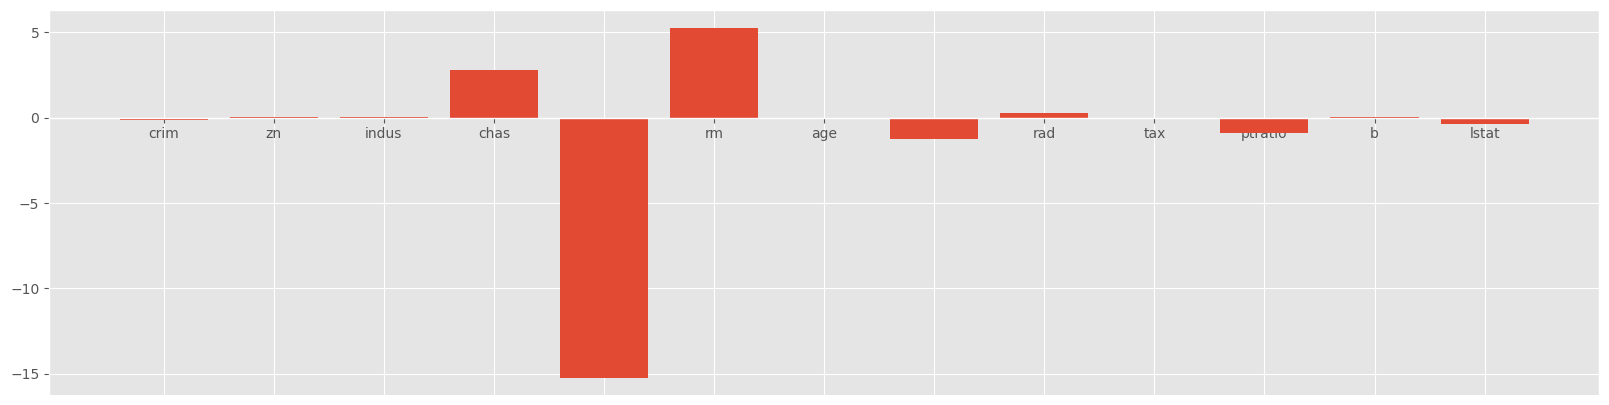

In [198]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd

fig,ax=plt.subplots(figsize=(20,5))

# Replace model_coef with the correct variable name coefficients
ax.bar(coefficients.index,coefficients["Coefficient"])

ax.spines["bottom"].set_position("zero")
plt.style.use("ggplot")
plt.grid(True)
plt.show()

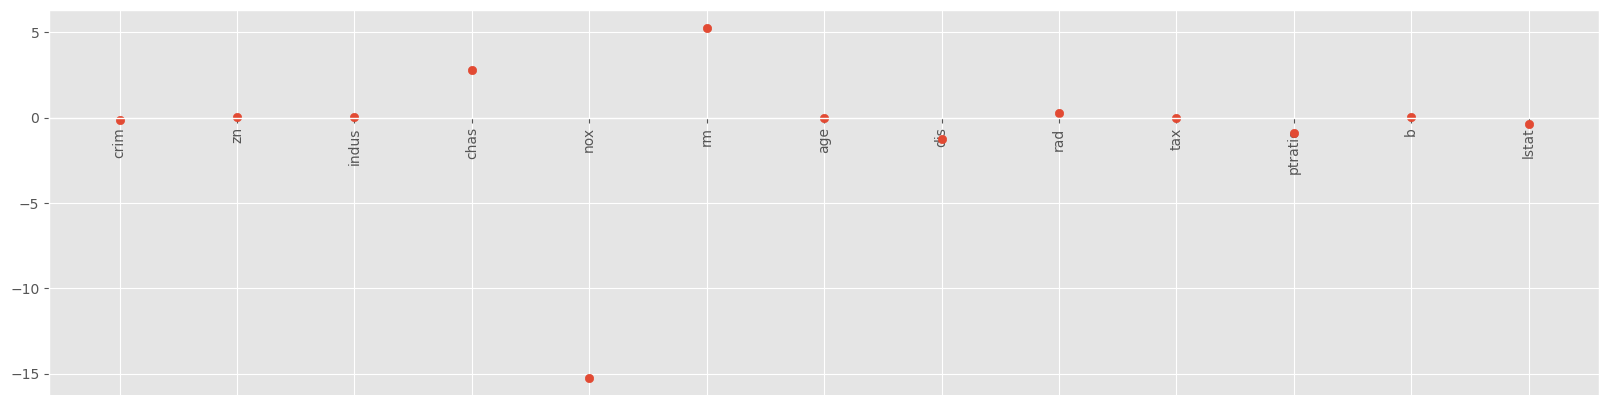

In [139]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd

fig,ax=plt.subplots(figsize=(20,5))

# Use the scatter function to create a scatter plot
ax.scatter(coefficients.index,coefficients["Coefficient"])

ax.spines["bottom"].set_position("zero")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.style.use("ggplot")
plt.grid(True)
plt.show()

In [28]:
  print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.24649091e-01  3.04735052e-02  2.17990089e-02  2.79225761e+00
 -1.52135247e+01  5.27249266e+00 -1.10577742e-02 -1.27320872e+00
  2.65804711e-01 -1.15043029e-02 -9.19571148e-01  1.01624292e-02
 -3.89712044e-01]
Intercept: 23.554245467591745


In [29]:
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 34.05648134887457


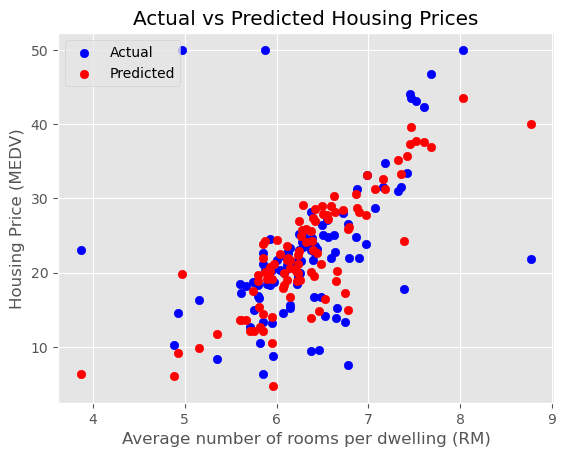

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X_test['rm'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['rm'], y_pred, color='red', label='Predicted')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing Price (MEDV)')
plt.title('Actual vs Predicted Housing Prices')
plt.legend()
plt.show()


In [32]:
y_pred = model.predict(X_test)
y_pred

array([23.01607649, 19.17545246, 19.93133255, 19.19222285,  4.73366059,
       11.75829383, 21.13445607, 28.55636813, 29.15015547, 13.98488866,
        6.11177952, 32.65621834, 18.81377591, 19.9985543 , 37.32169943,
       22.64542356, 29.02828657, 33.09225886, 10.54355651, 24.41353615,
       21.10593843, 27.75398389, 37.57971161, 13.68016992,  9.13663239,
       15.01638724, 35.69676984, 26.16279492, 25.59759605, 27.17821308,
       18.96002469, 30.58940542, 31.32207069, 16.44852282, 39.65470263,
       20.13979012, 18.89665346, 17.21466607, 21.63135449, 28.16696033,
       26.95807073, 18.92203938, 14.39403714, 25.86680086, 18.36942302,
       13.90509747, 24.99282465, 19.01042131, 20.59834287,  6.28489117,
       27.71713116, 26.91042242, 12.16976487, 40.01902667, 14.76458951,
       21.98077925, 20.19316318, 20.27107157, 23.6486951 , 22.00151727,
       20.75020815, 35.19539209, 17.48971422, 21.10693712, 23.91785914,
       43.48010393, 19.50077733, 20.14272922, 22.49586427, 28.18

In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print(f'R-squared: {r2:.4f}')


R-squared: 0.5785


In [34]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
crim,-0.124649
zn,0.030474
indus,0.021799
chas,2.792258
nox,-15.213525
rm,5.272493
age,-0.011058
dis,-1.273209
rad,0.265805
tax,-0.011504


In [35]:

#R-squared (0.6688) suggests that approximately 66.88% of the variance in the target variable is explained by the model.
#MSE (24.291) indicates the average squared difference between the actual and predicted values

In [36]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,Y_train)



Ridge()

In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print(f'R-squared: {r2:.4f}')

R-squared: 0.5785


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the target variable for the test data
y_pred = best_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(Y_test, y_pred)
print(f'R-squared: {r2:.4f}')

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
R-squared: 0.7996


In [39]:
#lasso regression

!pip install scikit-learn
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_coefficients = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
print(lasso_coefficients)


         Coefficient
crim       -0.097894
zn          0.049211
indus      -0.036619
chas        0.955190
nox        -0.000000
rm          3.703202
age        -0.010037
dis        -1.160538
rad         0.274707
tax        -0.014570
ptratio    -0.770654
b           0.010249
lstat      -0.568769


In [40]:
!pip install scikit-learn
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Lasso model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the accuracy metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the accuracy metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


R-squared: 0.6569712802223935
Mean Squared Error: 25.155593753934177
Mean Absolute Error: 3.1452398674037196


# implementation of our model

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Updated metrics for regression

# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model (without max_iter)
model = LinearRegression()
model.fit(X_train, Y_train)

# Evaluate the model on the training set (using appropriate metrics)
Y_pred_train = model.predict(X_train)
print("Training Mean Squared Error:", mean_squared_error(Y_train, Y_pred_train))
print("Training R-squared:", r2_score(Y_train, Y_pred_train))

# Evaluate the model on the testing set (using appropriate metrics)
Y_pred_test = model.predict(X_test)
print("Testing Mean Squared Error:", mean_squared_error(Y_test, Y_pred_test))
print("Testing R-squared:", r2_score(Y_test, Y_pred_test))

Training Mean Squared Error: 21.641412753226312
Training R-squared: 0.7508856358979673
Testing Mean Squared Error: 24.29111947497345
Testing R-squared: 0.6687594935356329


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize featurescaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the LinearRegression model (without max_iter)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model's performance (using appropriate metrics for regression)
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 21.52
R-squared: 0.7112


In [50]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 3.16


In [51]:
#using huber regrezssion
from sklearn.linear_model import HuberRegressor

huber_reg = HuberRegressor(alpha=0.9, max_iter=100)
huber_reg.fit(X_train, y_train)

y_pred_hub = huber_reg.predict(X_test)

mae_hub = mean_absolute_error(y_test, y_pred_hub)
print(f"Mean Absolute Error (Huber): {mae_hub:.2f}")

Mean Absolute Error (Huber): 3.47


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [53]:
#isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1)
iso_forest.fit(X_train)

outliers = iso_forest.predict(X_train)
outliers[outliers == -1] = 1  # Mark outliers as 1

X_train_clean = X_train[outliers == 1]
y_train_clean = y_train[outliers == 1]

# Refit the model on the cleaned data
model.fit(X_train_clean, y_train_clean)

# Print the results
print("Original Data Shape:", X_train.shape, y_train.shape)
print("Cleaned Data Shape:", X_train_clean.shape, y_train_clean.shape)
print("Number of Outliers Removed:", len(X_train) - len(X_train_clean))
print("New Mean Absolute Error (MAE):", mean_absolute_error(y_test, model.predict(X_test)))

Original Data Shape: (354, 13) (354,)
Cleaned Data Shape: (354, 13) (354,)
Number of Outliers Removed: 0
New Mean Absolute Error (MAE): 3.1627098714574102


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [54]:
#logsrithmic approach
import numpy as np

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)

mae_log = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Log): {mae_log:.2f}")

Mean Absolute Error (Log): 2.68


In [55]:
#elastic net regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 3.1374338178341987


In [56]:
# tune the hyperparameters of the Elastic Net Regression model.
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MAE:", grid_search.best_score_)

Best parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Best MAE: -3.4333369129269955


In [57]:
#winstonian
import numpy as np

def winsorize(data, threshold=3):
    data = np.array(data)
    mean = np.mean(data)
    std = np.std(data)
    lower_bound = mean - (threshold * std)
    upper_bound = mean + (threshold * std)
    data[data < lower_bound] = lower_bound
    data[data > upper_bound] = upper_bound
    return data

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
winsorized_data = winsorize(data)
print(winsorized_data)

[ 1  2  3  4  5  6  7  8  9 10 96]


In [60]:
# mae for winstoonio
import numpy as np

def calculate_mae(original_data, winsorized_data):
    mae = np.mean(np.abs(np.array(original_data) - np.array(winsorized_data)))
    return mae

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 96]
winsorized_data = winsorize(data)

mae = calculate_mae(data, winsorized_data)
print("MAE between original and winsorized data:", mae)

MAE between original and winsorized data: 0.36363636363636365


In [62]:
import numpy as np

def detect_outliers(data, threshold=3):
    data = np.array(data)
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    outliers = [x for x, z in zip(data, z_scores) if abs(z) > threshold]
    return outliers

def calculate_mae(outliers, data):
    mae = np.mean([abs(x - np.mean(data)) for x in outliers])
    return mae

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
outliers = detect_outliers(data)
mae = calculate_mae(outliers, data)

print("Outliers:", outliers)
print("Mean Absolute Error (MAE):", mae)

Outliers: [100]
Mean Absolute Error (MAE): 85.9090909090909


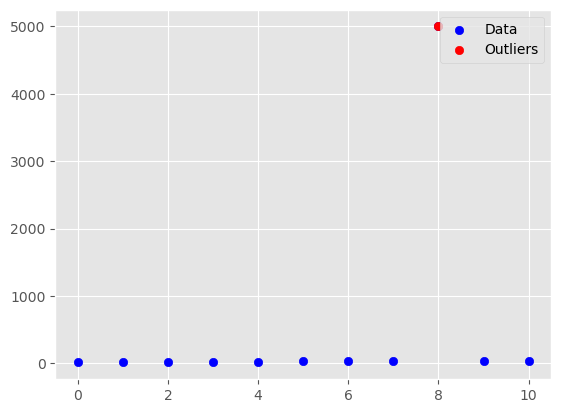

In [63]:
#z score big fail modeling and graph below
#Use the Z-score method when you want 
#to identify outliers based on the number of standard deviations from the mean, and you don't want to modify the original data.
import numpy as np
from scipy.stats import zscore

# Example dataset
data = np.array([12, 15, 18, 22, 25, 30, 32, 35, 5000, 38, 40])

# Calculate Z-scores for the dataset
z_scores = zscore(data)

# Set a threshold for identifying outliers
outlier_threshold = 3.0

# Identify outliers based on threshold
outliers_mask = np.abs(z_scores) > outlier_threshold

# Visualize the dataset with outliers highlighted
plt.scatter(np.arange(len(data)), data, c='b', label='Data')
plt.scatter(np.arange(len(data))[outliers_mask], data[outliers_mask], c='r', label='Outliers')
plt.legend()
plt.show()

In [172]:
#turning into supervised model
import pandas as pd
import numpy as np


# Convert the dataset into a supervised learning problem
X = []
y = []
for i in range(12, len(df)):
    X.append(df.iloc[i-12:i, 0:13].values)
    y.append(df.iloc[i, 13])
X = np.array(X)
y = np.array(y)




In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score



# Split the data into features and target
X = df.drop('medv', axis=1)
y = df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA, scaling, and random forest regression
pipe = Pipeline([
    ('pca', PCA(n_components=5)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the pipeline
pipe.fit(X_train, y_train)

# Evaluate the pipeline using cross-validation
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [-27.63678805 -53.84609274 -44.66150746 -47.95865878 -46.8452047 ]
Mean cross-validation score: -44.189650344938265


In [200]:
#This pipeline consists of two steps: data preprocessing using StandardScaler, and model training using RandomForestRegressor. The cross_val_score function is used to evaluate the pipeline using 5-fold cross-validation.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the pipeline steps
pipe = Pipeline([
    ('scaler', StandardScaler()),  # data preprocessing
    ('rf', RandomForestRegressor())  # model training
])

# Define the cross-validation strategy
scores = cross_val_score(pipe, X, y, cv=5)

print("Mean cross-validation score:", scores.mean())

Mean cross-validation score: 0.6263772694992717


In [201]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [None, 5, 10, 15],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 5, 10]
}

# Define the pipeline with the random forest regressor
pipe = Pipeline([
    ('scaler', StandardScaler()),  # data preprocessing
    ('rf', RandomForestRegressor())  # model training
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'rf__max_depth': 15, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best score: -20.853157811016334


In [202]:
# Create a new pipeline instance with the best hyperparameters
best_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200))
])

# Train the pipeline on your dataset
best_pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=15, n_estimators=200))])

In [203]:
# Make predictions using the optimized pipeline
y_pred = best_pipe.predict(X)

# Evaluate the performance of the pipeline
mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 1.42


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a StandardScaler and a RandomForestRegressor
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

# Define the hyperparameter grid for tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 15, 20]
}

# Create a GridSearchCV object to tune the pipeline
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 300}
Best score: -14.9566636989058


In [1]:
# Get the best-performing model from the GridSearchCV object
best_model = grid_search.best_estimator_

# Predict the target values for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_pred - y_test))

print("Mean Absolute Error (MAE):", mae)

NameError: name 'grid_search' is not defined